# Multiple Linear Regression
## Bike Sharing

#### Problem Statement:

US based Bike rental company wants to have a model which will predict the demand of bike rentals in particular situation

Essentially, the company wants —

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands


**Target variable is "cnt" which is the total number of users. These users are either "casual" or "registered"**

## Step 1: Reading and Understanding the Data
Importing NumPy and Pandas and reading the bike sharing dataset

In [121]:
# Supressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [122]:
import numpy as np
import pandas as pd

In [123]:
bikesharing = pd.read_csv("day.csv")
# Check the head of the dataset
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.1 Inspecting Various Aspects of Dataframe

In [124]:
bikesharing.shape

(730, 16)

In [125]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [126]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2- Performing EDA/ Cleaning of Data

In [127]:
#Replacing "Season" data with categorical values as per data dictionary
bikesharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [128]:
#Replacing "weathersit" data with categorical values
bikesharing.weathersit.replace({1:"Excellent", 2:"Good", 3:"Bad", 4:"Worse"}, inplace = True)
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Good,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Good,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Excellent,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Excellent,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Excellent,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [129]:
#Replacing "mnth" & "weekday" data with values
bikesharing.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}, inplace = True)
bikesharing.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'}, inplace = True)
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Good,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Good,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Excellent,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Excellent,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Excellent,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [130]:
#Replacing "workingday" with weekday or weekend values
#bikesharing.workingday.replace({0:"Weekend", 1:"Weekday"}, inplace = True)
#bikesharing.head()

In [131]:
# Given we already have the year, month and the day details, we can drop dteday
bikesharing.drop(['dteday'], axis = 1, inplace = True)
bikesharing.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,spring,0,Jan,0,Sat,0,Good,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,spring,0,Jan,0,Sun,0,Good,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,spring,0,Jan,0,Mon,1,Excellent,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,spring,0,Jan,0,Tue,1,Excellent,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,spring,0,Jan,0,Wed,1,Excellent,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [132]:
#As instance is an index column, dropping that column
bikesharing.drop(['instant'], axis = 1, inplace = True)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Sat,0,Good,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sun,0,Good,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Mon,1,Excellent,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tue,1,Excellent,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wed,1,Excellent,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [133]:
#Print number of unique values in all columns
bikesharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [134]:
#As registered & casual are not features of the dataset, we can drop these columns
bikesharing.drop(['casual', 'registered'], axis = 1, inplace = True)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Good,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Good,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Excellent,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Excellent,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Excellent,9.305237,11.46350,43.6957,12.522300,1600


In [135]:
#Checking for null values
bikesharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Inference
- As there are no null values, we do not need to perform missing value or null value updates

## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 2000x3000 with 0 Axes>

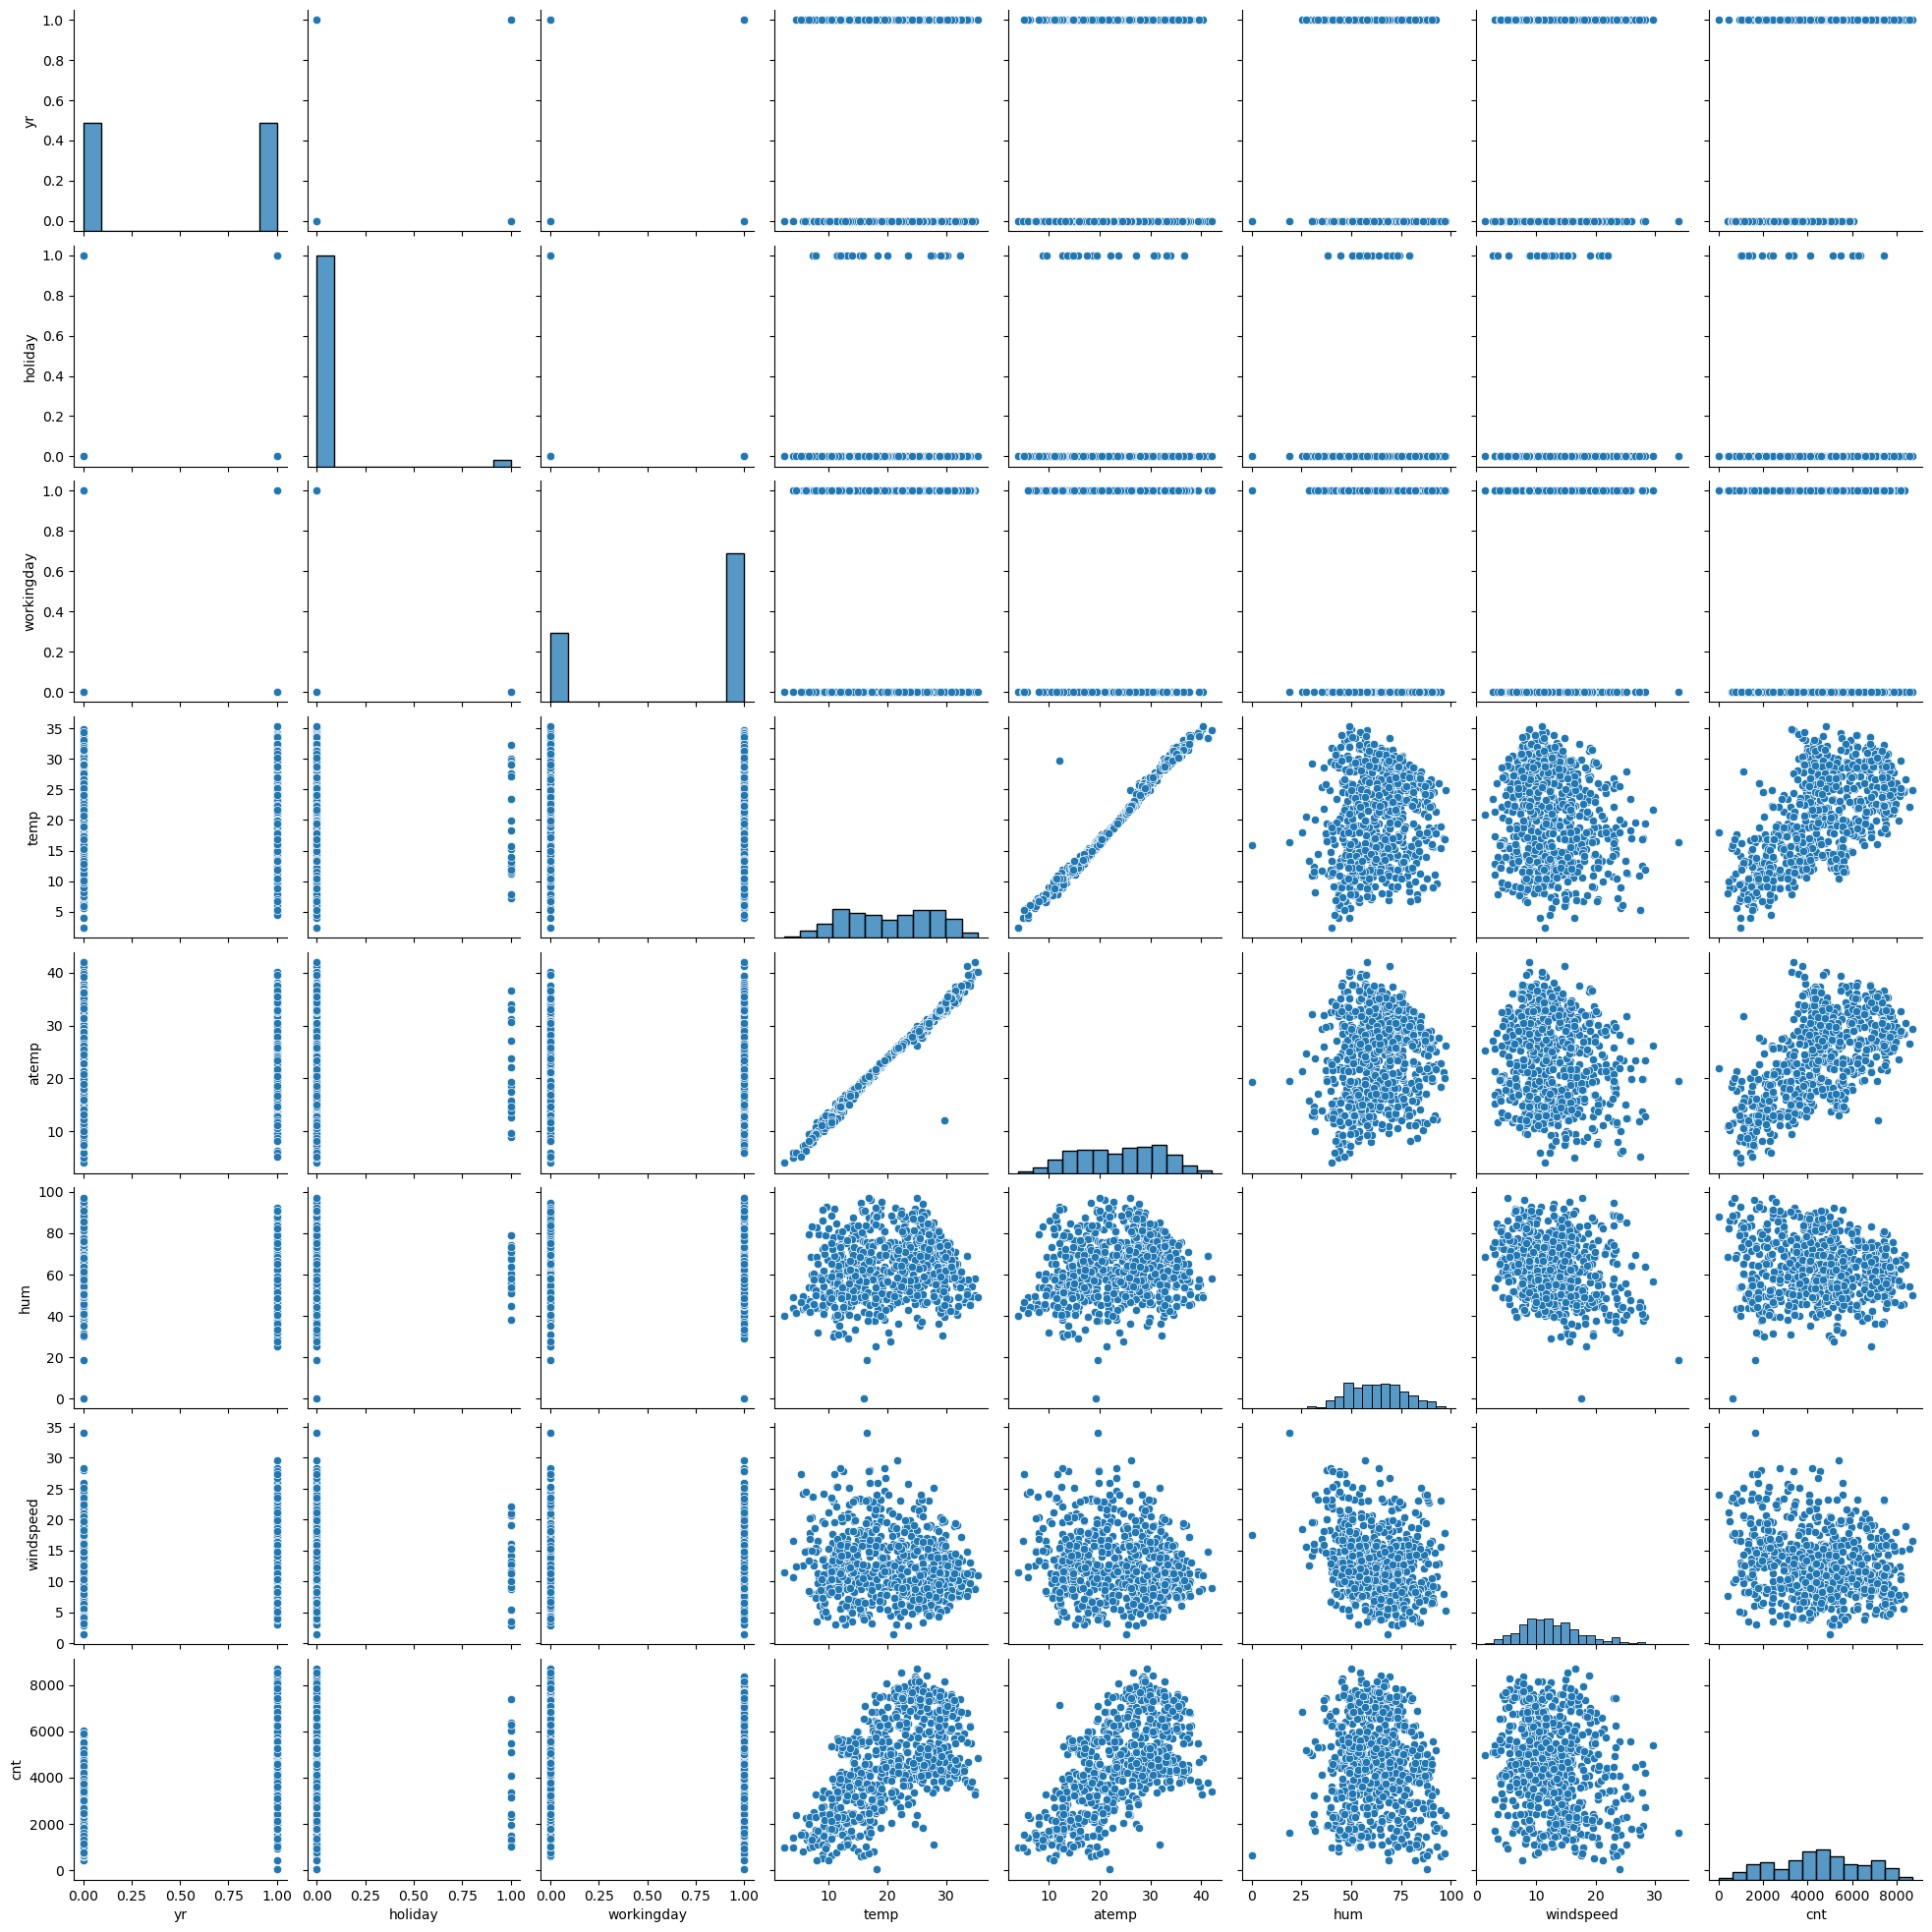

In [137]:
plt.figure(figsize = (20,30))
sns.pairplot(bikesharing)
plt.show()

### Inference
- From the above plots, we notice that cnt seems to have highest correlation with temp & atemp
- temp & atemp numerical data are highly correlated
- the correlation between cnt & casual , registered is only the outcome of cnt being sum of casual & registered users. Hence, we can take a decision of dropping the casual and registered columns as it may not affect the target variable "cnt"

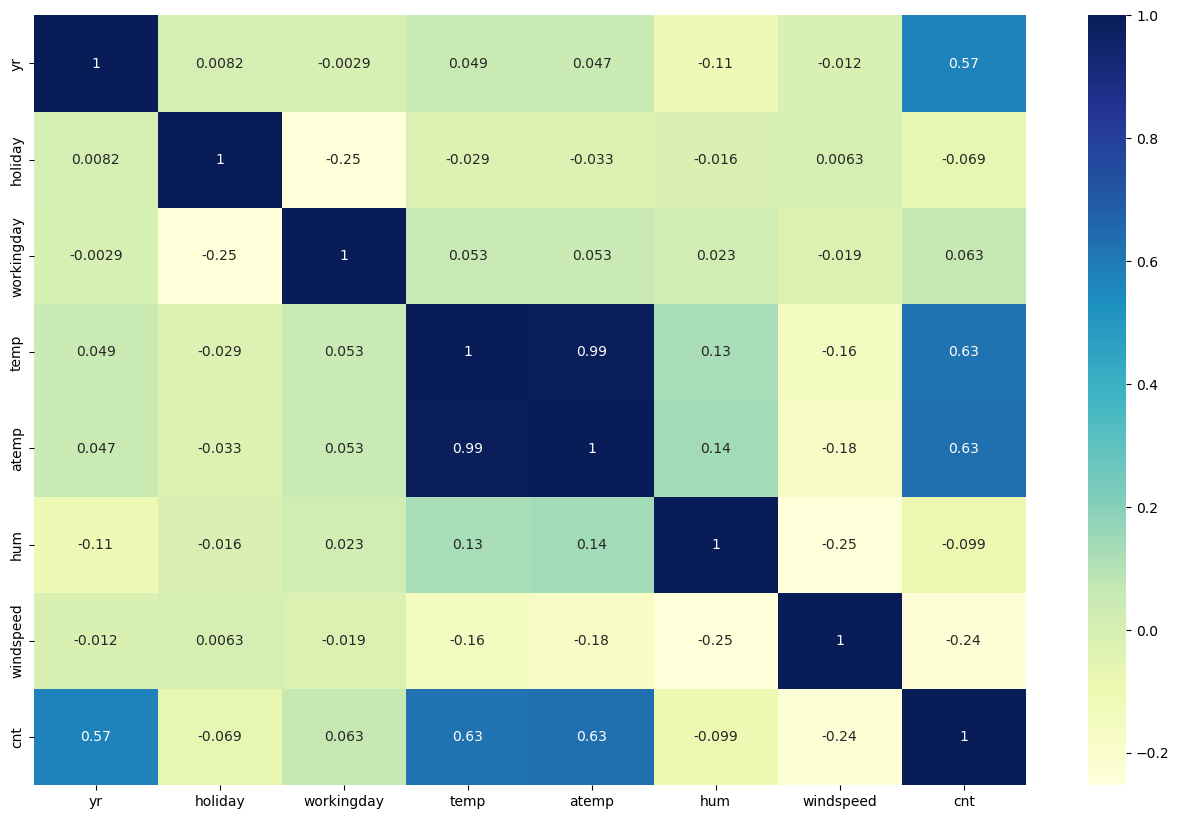

In [138]:
# Based on the above observations, let's see the correlation using heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(bikesharing.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Inference:
- Observations made above in pairplots and the heat map shows that "temp" and "atemp" have the highest correlation with target variable.
- Also, we see that the correlation between temp & atemp is 0.99 which indicates that either of the column is a derived column. So, we can drop atemp 
- We notice that target variable(cnt) is negatively correlated to "windspeed" and positively correlated to "hum","temp" and "atemp"


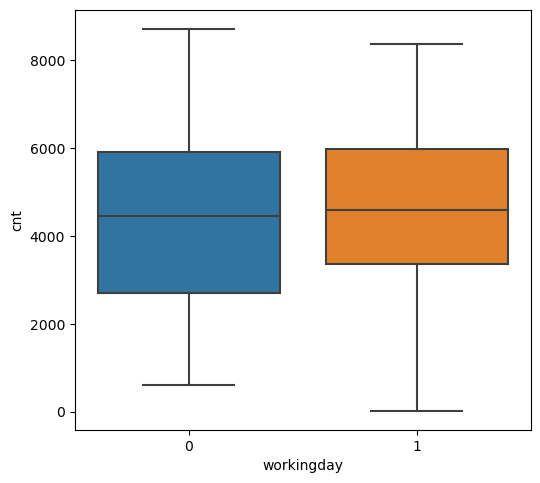

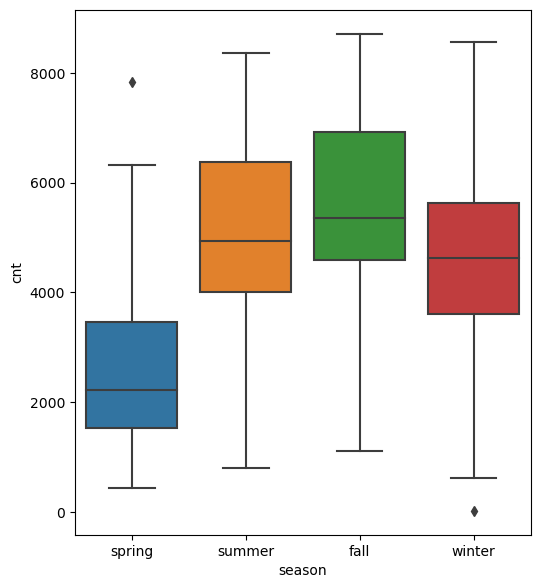

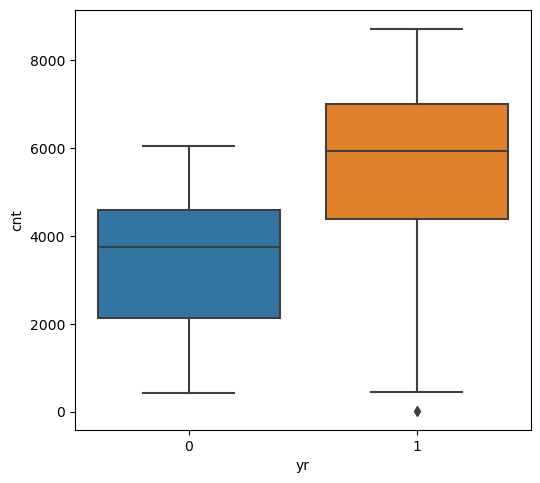

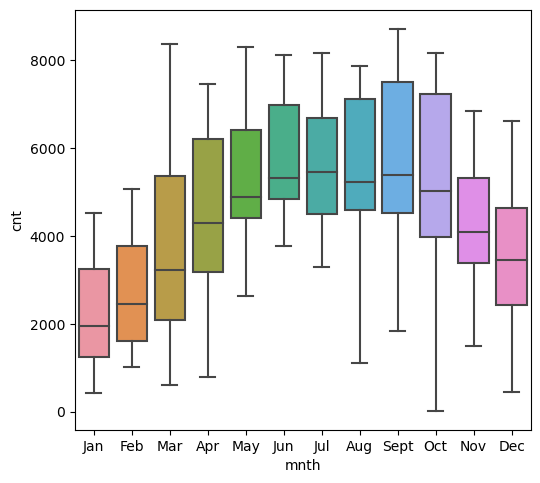

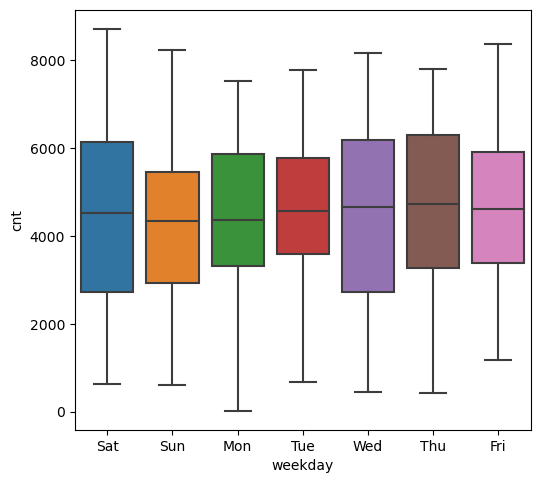

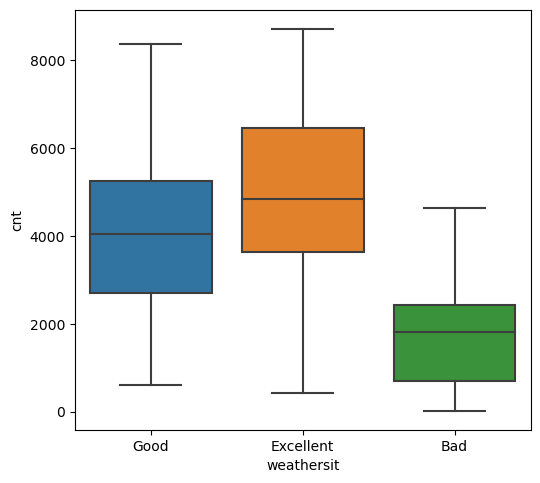

In [140]:
#Performing analysis on the Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.figure(figsize=(20, 15))
plt.subplot(2,3,6)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.figure(figsize=(20, 12))
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.figure(figsize =(20,12))
plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.figure(figsize =(20,12))
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.show()
plt.figure(figsize =(20,12))
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()

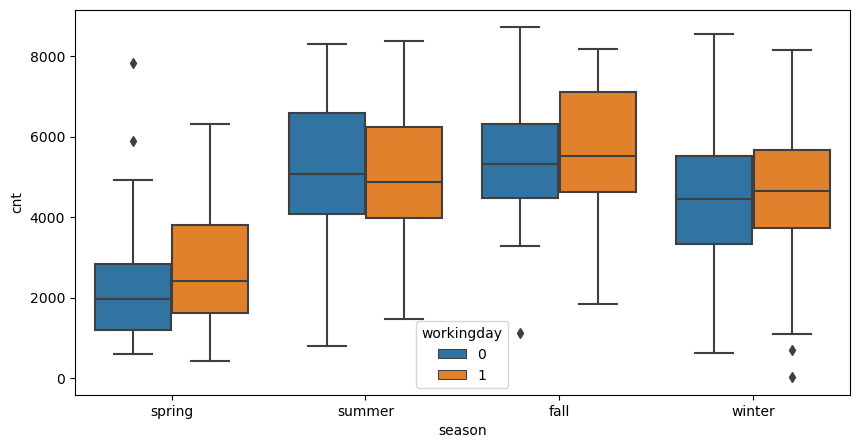

In [141]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bikesharing)
plt.show()

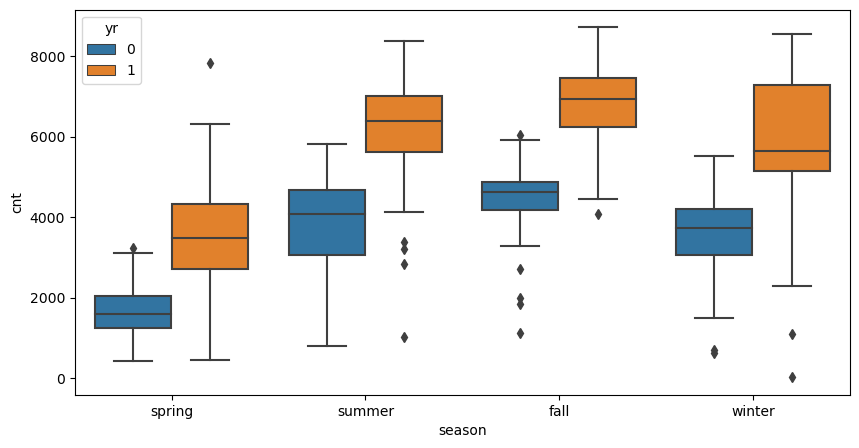

In [142]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = bikesharing)
plt.show()

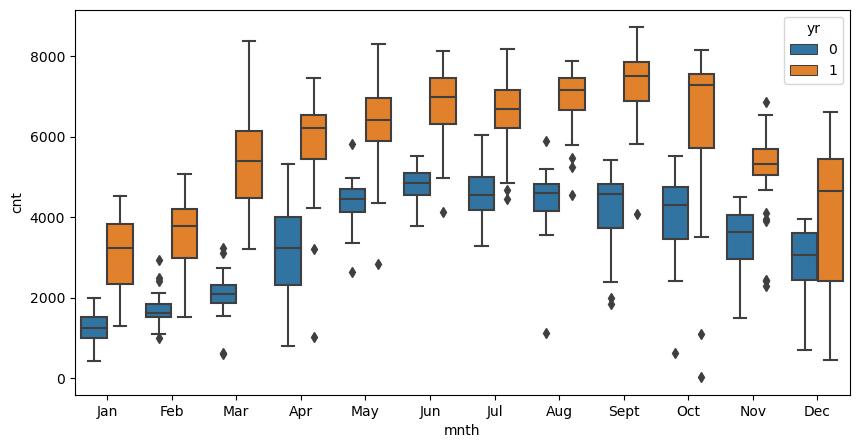

In [143]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = bikesharing)
plt.show()

### Inference
- Based on the above boxplots we can infer the below
    - The demand i,e the count is high in the "fall" season
    - The demand for renting bike has increased in 2019 as compared to 2018
    - If we analyze, we can notice that in Summer season during Weekend the demand is high
    - During "Excellent" weathersit which refers to "Clear, Few clouds, Partly cloudy, Partly cloudy" weather conditions the cnt is high.
    - We can notice that the demand continuously increases from Jan till Jun and then there is a decrease in Jul again increasing the month of Sep and then decreasing till end of year.

## Step 4: Data Preparation for Linear Regression

In [144]:
# Creating Dummy Variables for categorical variables
bikesharing = pd.get_dummies(data=bikesharing,columns=["season","mnth","weekday"],drop_first=True)
# Printing columns after dummy creation
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [145]:
#Creating Dummy variable for weathersit
bikesharing = pd.get_dummies(data=bikesharing,columns=["weathersit"])
# Printing columns after dummy creation
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Bad', 'weathersit_Excellent',
       'weathersit_Good'],
      dtype='object')

In [146]:
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Excellent,weathersit_Good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


## Step 5: Splitting the Data into Training and Testing Sets
First basic step for regression is performing a train-test split.

In [147]:
bikesharing.shape

(730, 31)

In [148]:
from sklearn.model_selection import train_test_split

#y to contain only target variable
y=bikesharing.pop('cnt')

#X is all remainign variable also our independent variables
X=bikesharing

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [149]:
#print train and test sets shape
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### Feature Scaling

In [150]:
# Importing all libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.preprocessing import MinMaxScaler



In [151]:
scaler = MinMaxScaler()

#Scaling continuous variables
num_vars = ['temp','atemp','hum','windspeed']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])


In [152]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Excellent,weathersit_Good
707,1,0,0,0.417140,0.434610,0.933018,0.243629,0,0,1,...,0,0,0,1,0,0,0,0,0,1
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0,0,0,...,0,0,0,0,0,0,1,0,1,0
14,0,0,0,0.223565,0.236172,0.513954,0.243603,1,0,0,...,0,0,1,0,0,0,0,0,0,1
204,0,0,0,0.989306,1.000000,0.567625,0.267859,0,0,0,...,0,0,0,1,0,0,0,0,1,0
182,0,0,0,0.871664,0.821838,0.458136,0.150755,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [153]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Excellent,weathersit_Good
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.483366,0.023483,0.706458,0.552390,0.544999,0.644967,0.317738,0.244618,0.254403,0.252446,...,0.064579,0.152642,0.135029,0.135029,0.144814,0.150685,0.138943,0.031311,0.626223,0.342466
std,0.500213,0.151581,0.455831,0.230467,0.223170,0.149518,0.167252,0.430282,0.435952,0.434842,...,0.246023,0.359994,0.342090,0.342090,0.352258,0.358092,0.346226,0.174328,0.484280,0.474999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.345523,0.524903,0.197851,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.551893,0.555450,0.650064,0.294759,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.731772,0.752469,0.406464,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 6 - Build a Model using RFE and Automated approach
Use RFE to eliminate some columns

In [154]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [191]:
#Cut down number of features for using automated approach
rfe = RFE(lr)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [192]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 5),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 15),
 ('mnth_Sept', False, 4),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 12),
 ('weathersit_Bad', True, 1),
 ('weathersit_Excellent', True, 1),
 ('weathersit_Good', True, 1)]

In [193]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [194]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
import statsmodels.api as sm 
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [195]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [196]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
       'weekday_Sat', 'weathersit_Bad', 'weathersit_Excellent',
       'weathersit_Good'],
      dtype='object')

In [197]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

In [199]:
# Taking columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
       'weekday_Sat', 'weathersit_Bad', 'weathersit_Excellent',
       'weathersit_Good']]

In [200]:
X_train_rfe.shape

(511, 15)

#### 6.3 Model 1 Generation

In [73]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
       'weekday_Sat', 'weathersit_Bad', 'weathersit_Excellent',
       'weathersit_Good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.50e-191
Time:                        19:36:42   Log-Likelihood:                -4114.2
No. Observations:                 511   AIC:                             8258.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1825.7311 

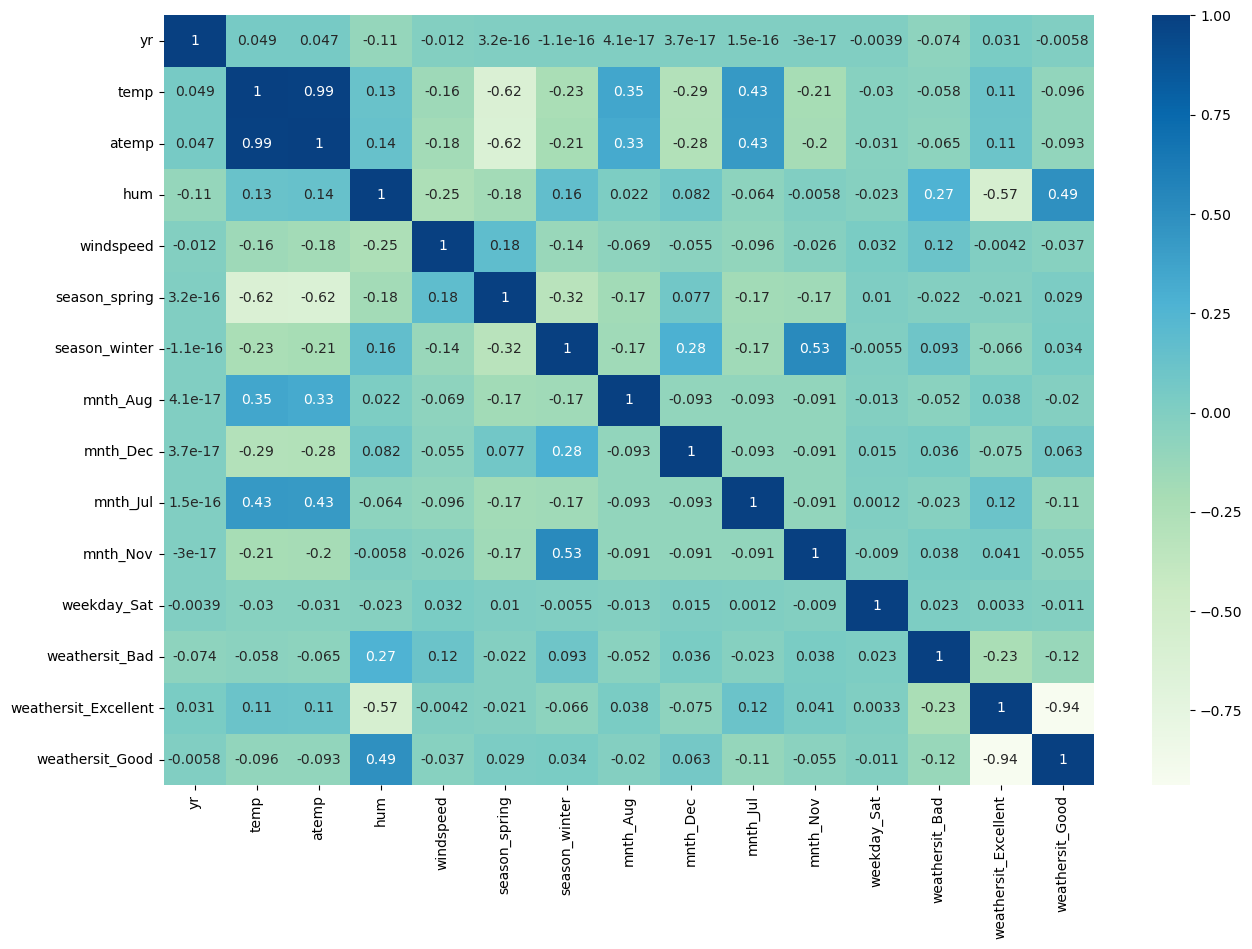

In [164]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikesharing[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
       'weekday_Sat', 'weathersit_Bad', 'weathersit_Excellent',
       'weathersit_Good']].corr(), cmap='GnBu', annot=True)
plt.show()

#### 6.4 Model -2 Generation

In [75]:
#Dropping atemp variable as it has high p-value and trying to build Model 2
cols = ['yr', 'temp',  'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
       'weekday_Sat', 'weathersit_Bad', 'weathersit_Excellent',
       'weathersit_Good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.09e-192
Time:                        19:37:15   Log-Likelihood:                -4114.3
No. Observations:                 511   AIC:                             8257.
Df Residuals:                     497   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1827.8182 

#### 6.5 Model -3 Generation

In [77]:
#Building next model by dropping 'weekday_Sat' as it has high p-value 
cols = ['yr', 'temp',  'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
        'weathersit_Bad', 'weathersit_Excellent',
       'weathersit_Good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     226.2
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          9.72e-193
Time:                        19:38:50   Log-Likelihood:                -4117.0
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     498   BIC:                             8315.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1866.2941 

#### 6.6 Model -4 Generation

In [78]:
#Building next model by dropping 'weathersit_Excellent' as it has high VIF
cols = ['yr', 'temp',  'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
        'weathersit_Bad',        'weathersit_Good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     226.2
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          9.72e-193
Time:                        19:40:49   Log-Likelihood:                -4117.0
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     498   BIC:                             8315.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3192.1590    268.256     

#### 6.7 Model -5 Generation

In [166]:
#Building next model by dropping 'hum' as it has high VIF
cols = ['yr', 'temp',  'windspeed', 'season_spring',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
        'weathersit_Bad',        'weathersit_Good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.3
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          1.59e-187
Time:                        00:47:02   Log-Likelihood:                -4132.2
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     499   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2297.0500    219.998     

#### 6.8 Model -6 Generation

In [168]:
#Building next model by dropping 'mnth_Aug' as it has high p-value and -ve coefficient
cols = ['yr', 'temp',  'windspeed', 'season_spring',
       'season_winter',  'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
        'weathersit_Bad',        'weathersit_Good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          4.51e-187
Time:                        00:47:13   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     500   BIC:                             8341.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2383.2141    219.272     

#### Inference
In this model VIF seems to be acceptable. p-value for all the features is  almost 0.0 and R2 is 0.833 
Therefore selecting this as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
Difference between R-squared and Adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.

In [169]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [170]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'temp',  'windspeed', 'season_spring',
       'season_winter',  'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
        'weathersit_Bad',        'weathersit_Good']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

2383.2141010281202 [ 2051.84403167  3677.87103509 -1270.16491922 -1106.74012694
   622.3780223   -465.22024377  -463.51896836  -591.80067247
 -2286.16620389  -668.67416667]


## Step -7 Model Evaluation

### 7.1  Residual Analysis

In [172]:
y_train_pred = lr.predict(X_train[cols])

In [173]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

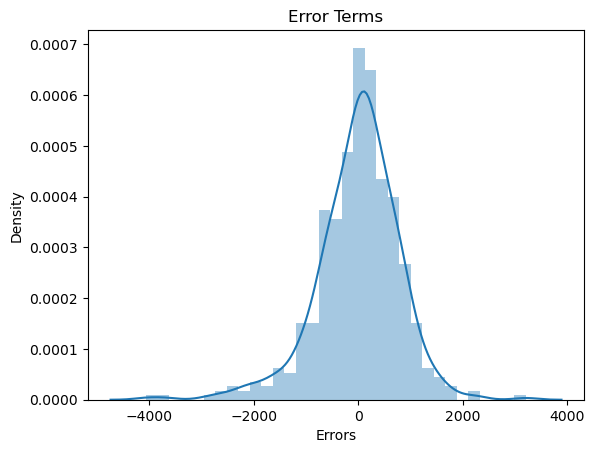

In [174]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

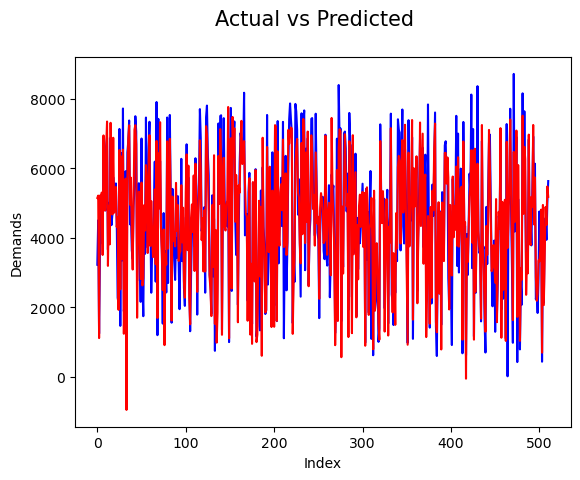

In [175]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Actual and Predicted result following almost the same pattern so this model seems accpetable

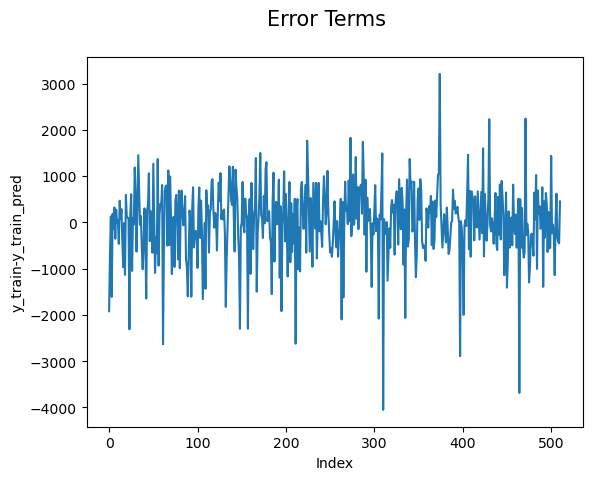

In [176]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### We see that the error terms are independent of each other.

In [177]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8329035918621734

### Inference
R2 Same as we obtained for our final model

### 7.2 Linearity Check

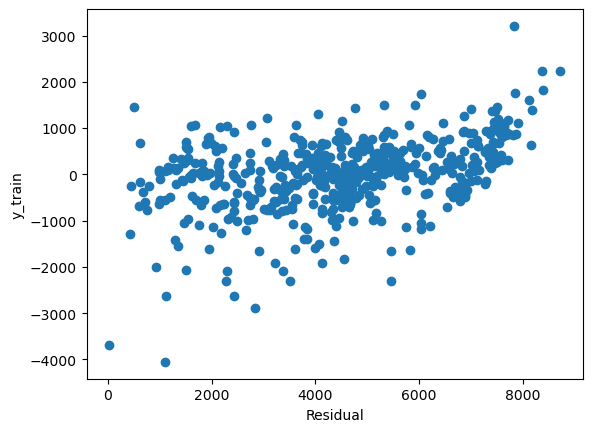

In [178]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 7.3 Predict values for test data set

In [179]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [180]:
#Columns from our final model
cols = ['yr', 'temp',  'windspeed', 'season_spring',
       'season_winter',  'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
        'weathersit_Bad',        'weathersit_Good']

#Predict the values for test data
y_pred = lr.predict(X_test[cols])

In [181]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_pred)

0.8043025869266608

Inference
R2 value for predictions on test data (0.804) is almost same as R2 value of train data(0.833). This is a good R-squared value, hence we can conclude our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_pred')

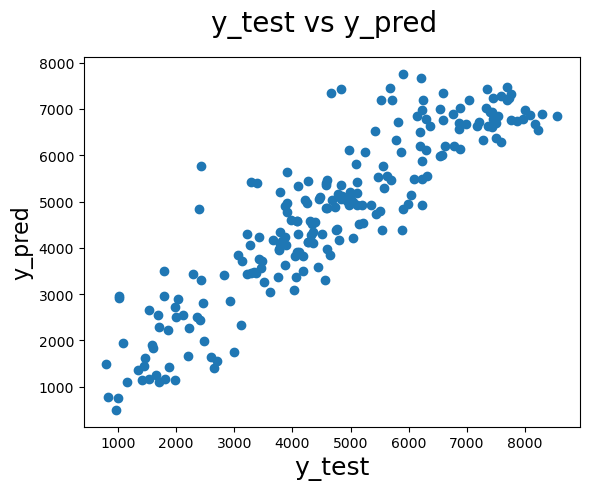

In [182]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Inference
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### 7.6 Plot Test vs Predicted test values

In [183]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

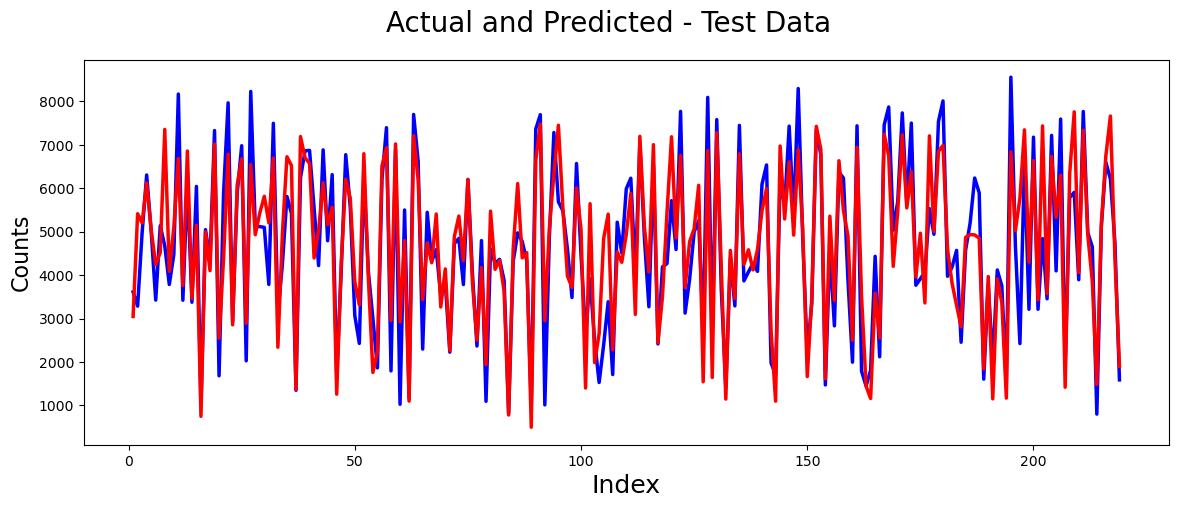

In [184]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_pred,len(y_test)+1,'Test Data')

### Inference
As we can see predictions for test data is very close to actuals

### Plot Error Terms for test data

In [98]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

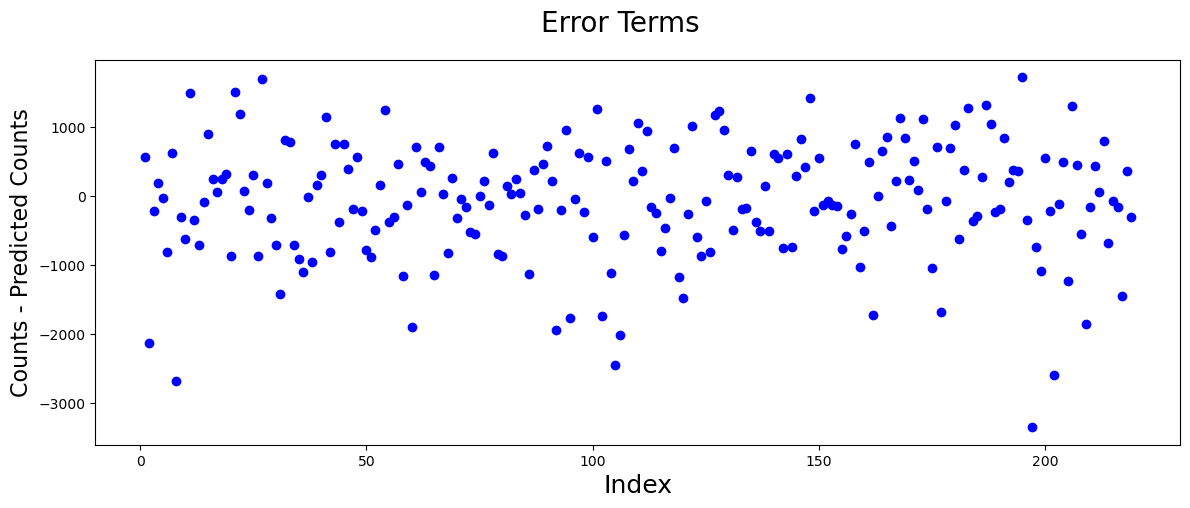

In [185]:
#Plot error terms for test data
plot_err_terms(y_test,y_pred)

### Inference
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

In [186]:
# Checking data before scaling
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Excellent,weathersit_Good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,1,0,1,0


### 8.1 Interpretation of the Model

#### Interpreting RFE with Manual model results as we give more importance to imputation

In [187]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'temp',  'windspeed', 'season_spring',
       'season_winter',  'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
        'weathersit_Bad',        'weathersit_Good']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          4.51e-187
Time:                        00:54:43   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     500   BIC:                             8341.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2383.2141    219.272     

### Interpretation of results

### Analysing the above model, the company should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during July through Dec with highest demand in Sep.
- Based on previous data it is expected to have a boom in demand once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes, build on strategy to add more bikes without having business impact.





### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- temp
- Season
- months(July through Dec)
- Year (2019)
- weathersit( Light Snow, Mist + Cloudy)

In [189]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8043025869266608